In [39]:
from lrbound.qa_lr import *
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [71]:
bad_ballsb=[]
bad_values_locb=[]
bad_values_globb=[]
omega_star=[]
worst_balls=[]

with open("../energy_log.txt",'r') as f:
    for li in f.readlines():
        l=li.split(' ')
        if li[0]=='p':
            bad_ballsb.append(l[0])
            bad_values_globb.append(float(l[-1]))
        elif li[0]=="w":
            omega_star.append(float(l[9]))
            worst_balls.append(l[4])
        elif li[0]=='-':
            bad_values_locb.append(float(l[-1]))
            
    f.close()
    
dict_balls={}
for b in bad_ballsb:
    num=b[6:9]
    if num not in dict_balls.keys():
        dict_balls[num]=0
    dict_balls[num]+=1
    
balls2plot_loc=[]
for i,v in enumerate(bad_values_locb):
    if v<0.70576:
        balls2plot_loc.append(bad_ballsb[i])
        
balls2plot_glob=[]
for i,v in enumerate(bad_values_globb):
    if v<0.6942:
        balls2plot_glob.append(bad_ballsb[i])
        


<IPython.core.display.Latex object>

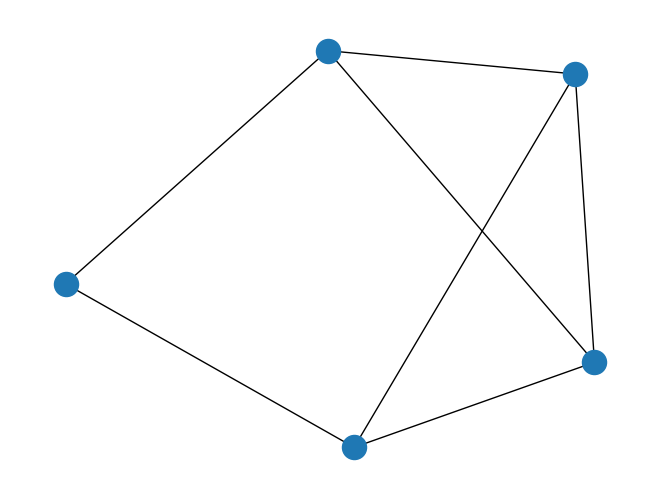

<IPython.core.display.Latex object>

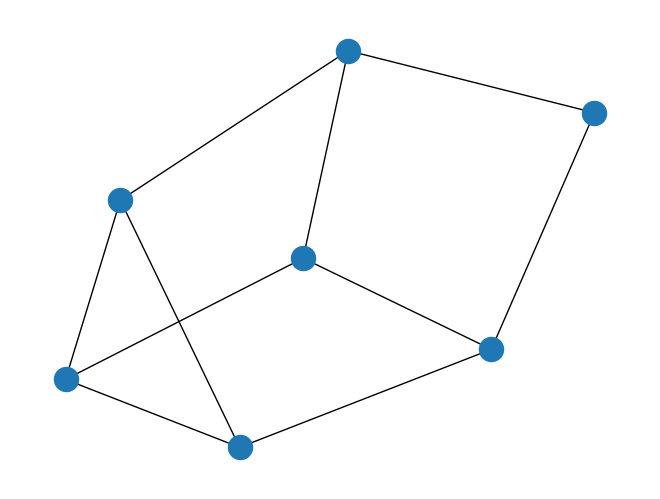

<IPython.core.display.Latex object>

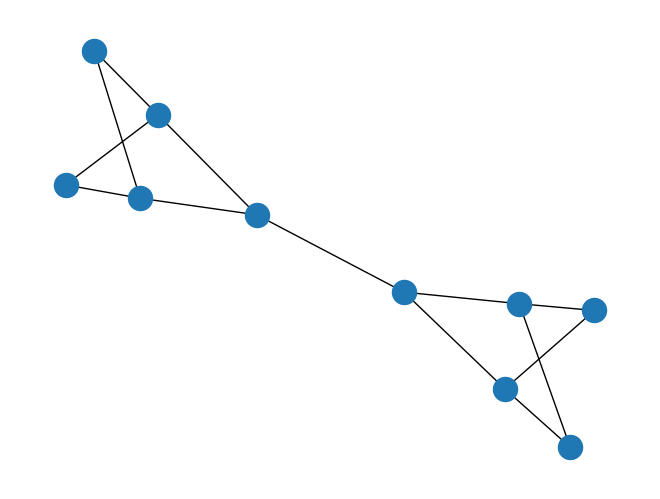

In [59]:
for i,b in enumerate(worst_balls):
    g = nx.read_adjlist(f"../balls/2/{b}")
    display(Latex(f"ball {b} with corresponding $\langle O_X \\rangle_{i+1}^* $ ={round(omega_star[i],ndigits=5)}"))
    nx.draw(g)
    plt.show()

In [ ]:
d=3
r=2*3+2
msglob=[[] for _ in range(18)]
msloc=[[] for _ in range(18)]


for a in np.linspace(1,2,51):
    solsloc=[[] for _ in range(18)]
    solsglob=[[] for _ in range(18)]
    
    for t in np.linspace(2.65,3.8,111):    

        for i in range(18):
            g = nx.read_adjlist(f"balls/3/{balls2plot_loc[i]}")
            edge_energy_loc = edge_energy(g, t, a)
            
            
            solsloc[i].append((edge_energy_loc-loc_lr_p3(g,t,a),t))
            
            g = nx.read_adjlist(f"balls/3/{balls2plot_glob[i]}")
            edge_energy_glob = edge_energy(g, t, a)
            solsglob[i].append((edge_energy_glob-lr_alpha(r,d,t,a),t))

    for i in range(18):
        msloc[i].append(max(solsloc[i]))
        msglob[i].append(max(solsglob[i]))


In [ ]:
for i in range(18):
    plt.plot(np.linspace(1,2,51), np.array(msloc[i])[:,0])#, label=f"{i}")

plt.hlines(0.6925,1,2,'k','--',label="QAOA ratio")
plt.hlines(0.6980,1,2,'b','--',label="Hastings ratio")
plt.hlines(0.7,1,2,'r','--',label="0.7")

plt.xlabel("alpha")
#plt.title("max_T [<O_X>_{G,alpha} - epsilon(p=3,T,alpha,B)] against alpha")
plt.legend()

plt.savefig("worst_ratio_loc3.pdf")
min(max(msloc[i]) for i in range(18))

In [ ]:
for i in range(18):
    plt.plot(np.linspace(1,2,51), np.array(msglob[i])[:,0])#, label=f"{i}")

plt.hlines(0.6925,1,2,'k','--',label="QAOA ratio")
plt.hlines(0.6980,1,2,'b','--',label="Hastings ratio")
plt.hlines(0.7,1,2,'r','--',label="0.7")

plt.xlabel("alpha")
#plt.title("max_T [<O_X>_{G,alpha} - epsilon(p=3,T,alpha,B)] against alpha")
plt.legend()

plt.savefig("worst_ratio_glob.pdf")
min(max(msglob[i]) for i in range(18))